# MNIST digits classification with TensorFlow

<img src="images/mnist_sample.png" style="width:30%">

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print("We're using TF", tf.__version__)

import sys
sys.path.append("../")
import grading

import matplotlib_utils
from importlib import reload
reload(matplotlib_utils)

import grading_utils
reload(grading_utils)

import keras_utils_hse
from keras_utils_hse import reset_tf_session

We're using TF 2.0.0


# Fill in your Coursera token and email
To successfully submit your answers to our grader, please fill in your Coursera submission token and email

In [2]:
grader = grading.Grader(assignment_key="XtD7ho3TEeiHQBLWejjYAA", 
                        all_parts=["9XaAS", "vmogZ", "RMv95", "i8bgs", "rE763"])

In [3]:
# token expires every 30 min
COURSERA_TOKEN = "DiJFRWdFgrhFWySQ"
COURSERA_EMAIL = "g.lukicov@ucl.ac.uk"

# Look at the data

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [21]:
import preprocessed_mnist
X_train, y_train, X_val, y_val, X_test, y_test = preprocessed_mnist.load_dataset()

X_train [shape (50000, 28, 28)] sample patch:
 [[0.         0.29803922 0.96470588 0.98823529 0.43921569]
 [0.         0.33333333 0.98823529 0.90196078 0.09803922]
 [0.         0.33333333 0.98823529 0.8745098  0.        ]
 [0.         0.33333333 0.98823529 0.56862745 0.        ]
 [0.         0.3372549  0.99215686 0.88235294 0.        ]]
A closeup of a sample patch:


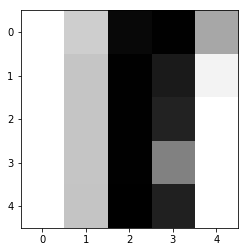

And the whole sample:


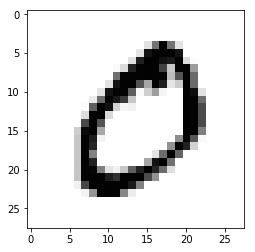

y_train [shape (50000,)] 10 samples:
 [5 0 4 1 9 2 1 3 1 4]


In [22]:
# X contains rgb values divided by 255
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10])
print("A closeup of a sample patch:")
plt.imshow(X_train[1, 15:20, 5:10], cmap="Greys")
plt.show()
print("And the whole sample:")
plt.imshow(X_train[1], cmap="Greys")
plt.show()
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10])

# Linear model

Your task is to train a linear classifier $\vec{x} \rightarrow y$ with SGD using TensorFlow.

You will need to calculate a logit (a linear transformation) $z_k$ for each class: 
$$z_k = \vec{x} \cdot \vec{w_k} + b_k \quad k = 0..9$$

And transform logits $z_k$ to valid probabilities $p_k$ with softmax: 
$$p_k = \frac{e^{z_k}}{\sum_{i=0}^{9}{e^{z_i}}} \quad k = 0..9$$

We will use a cross-entropy loss to train our multi-class classifier:
$$\text{cross-entropy}(y, p) = -\sum_{k=0}^{9}{\log(p_k)[y = k]}$$ 

where 
$$
[x]=\begin{cases}
       1, \quad \text{if $x$ is true} \\
       0, \quad \text{otherwise}
    \end{cases}
$$

Cross-entropy minimization pushes $p_k$ close to 1 when $y = k$, which is what we want.

Here's the plan:
* Flatten the images (28x28 -> 784) with `X_train.reshape((X_train.shape[0], -1))` to simplify our linear model implementation
* Use a matrix placeholder for flattened `X_train`
* Convert `y_train` to one-hot encoded vectors that are needed for cross-entropy
* Use a shared variable `W` for all weights (a column $\vec{w_k}$ per class) and `b` for all biases.
* Aim for ~0.93 validation accuracy

In [23]:
X_train_flat = X_train.reshape((X_train.shape[0], -1))
print(X_train_flat.shape)

X_val_flat = X_val.reshape((X_val.shape[0], -1))
print(X_val_flat.shape)

(50000, 784)
(10000, 784)


In [24]:
import keras

y_train_oh = keras.utils.to_categorical(y_train, 10)
y_val_oh = keras.utils.to_categorical(y_val, 10)

print(y_train_oh.shape)
print(y_train_oh[:3], y_train[:3])

(50000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] [5 0 4]


In [25]:
# run this again if you remake your graph
# s = reset_tf_session()
s = tf.InteractiveSession()

/usr/local/lib/python3.7/site-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [28]:
# Model parameters: W and b
W = tf.get_variable("W", shape=(784, 10), dtype=tf.float32, trainable=True) ### YOUR CODE HERE ### tf.get_variable(...) with shape[0] = 784
b = tf.get_variable("b", shape=(1, 10), dtype=tf.float32, trainable=True) ### YOUR CODE HERE ### tf.get_variable(...)

ValueError: Variable W already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 1751, in __init__
    self._traceback = tf_stack.extract_stack()
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3429, in _create_op_internal
    op_def=op_def)
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py", line 3360, in create_op
    attrs, op_def, compute_device)
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.7/site-packages/tensorflow_core/python/framework/op_def_library.py", line 793, in _apply_op_helper
    op_def=op_def)


In [29]:
# Placeholders for the input data
input_X = tf.placeholder('float32', shape=(None, 784), name="X") ### YOUR CODE HERE ### tf.placeholder(...) for flat X with shape[0] = None for any batch size
input_y = tf.placeholder('float32', shape=(None, 10), name="y") ### YOUR CODE HERE ### tf.placeholder(...) for one-hot encoded true labels

In [30]:
print(input_X.shape)
print(W.shape)

(?, 784)
(784, 10)


In [31]:
# Compute predictions
logits = tf.matmul(input_X, W) + b  ### YOUR CODE HERE ### logits for input_X, resulting shape should be [input_X.shape[0], 10]
probas = tf.nn.softmax(logits) ### YOUR CODE HERE ### apply tf.nn.softmax to logits
classes = tf.argmax(probas, axis=1) ### YOUR CODE HERE ### apply tf.argmax to find a class index with highest probability

# Loss should be a scalar number: average loss over all the objects with tf.reduce_mean().
# Use tf.nn.softmax_cross_entropy_with_logits on top of one-hot encoded input_y and logits.
# It is identical to calculating cross-entropy on top of probas, but is more numerically friendly (read the docs).
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=logits)) ### YOUR CODE HERE ### cross-entropy loss

# Use a default tf.train.AdamOptimizer to get an SGD step
step = tf.train.AdamOptimizer(0.01).minimize(loss) ### YOUR CODE HERE ### optimizer step that minimizes the loss

In [32]:
print(logits.shape)
print(probas.shape)
print(classes.shape)
tf.trainable_variables()

(?, 10)
(?, 10)
(?,)


[<tf.Variable 'W:0' shape=(784, 10) dtype=float32_ref>,
 <tf.Variable 'b:0' shape=(1, 10) dtype=float32_ref>,
 <tf.Variable 'dense/kernel:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'dense/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_1/kernel:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'dense_1/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32_ref>,
 <tf.Variable 'dense_3/kernel:0' shape=(784, 256) dtype=float32_ref>,
 <tf.Variable 'dense_3/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_4/kernel:0' shape=(256, 256) dtype=float32_ref>,
 <tf.Variable 'dense_4/bias:0' shape=(256,) dtype=float32_ref>,
 <tf.Variable 'dense_5/kernel:0' shape=(256, 10) dtype=float32_ref>,
 <tf.Variable 'dense_5/bias:0' shape=(10,) dtype=float32_ref>]

In [33]:
s.run(tf.global_variables_initializer())

summary_writer = tf.summary.FileWriter("digits_logs/1", s.graph)

BATCH_SIZE = 512
EPOCHS = 40

# for logging the progress right here in Jupyter (for those who don't have TensorBoard)
simpleTrainingCurves = matplotlib_utils.SimpleTrainingCurves("cross-entropy", "accuracy")

for epoch in range(EPOCHS):  # we finish an epoch when we've looked at all training samples
    
    batch_losses = []
    for batch_start in range(0, X_train_flat.shape[0], BATCH_SIZE):  # data is already shuffled
        _, batch_loss = s.run([step, loss], {input_X: X_train_flat[batch_start:batch_start+BATCH_SIZE], 
                                             input_y: y_train_oh[batch_start:batch_start+BATCH_SIZE]})
        # collect batch losses, this is almost free as we need a forward pass for backprop anyway
        batch_losses.append(batch_loss)
       #summary_writer.add_summary(batch_loss, epoch)
        summary_writer.flush()

    train_loss = np.mean(batch_losses)
    val_loss = s.run(loss, {input_X: X_val_flat, input_y: y_val_oh})  # this part is usually small
    train_accuracy = accuracy_score(y_train, s.run(classes, {input_X: X_train_flat}))  # this is slow and usually skipped
    valid_accuracy = accuracy_score(y_val, s.run(classes, {input_X: X_val_flat}))  
    simpleTrainingCurves.add(train_loss, val_loss, train_accuracy, valid_accuracy)

        

<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA2AAAAEgCAYAAADSVRDhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4xLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvDW2N/gAAIABJREFUeJzs3XlYVdX6wPHvYVAUBAQnJidARQRRUDFzzkxQnKfSLDSrqzfLyiyv5m24en9500rNtFKznNJMLcc0p1JRjAzRwAFlUgGVUeTAWb8/duw8MaipIPp%2Bnmc/55w9rn3Qc3h513qXQSmlEEIIIYQQQghx11lUdAOEEEIIIYQQ4kEhAZgQQgghhBBClBMJwIQQQgghhBCinEgAJoQQQgghhBDlRAIwIYQQQgghhCgnEoAJIYQQQgghRDmRAEwIIYQQQgghyokEYEIIIYQQQghRTiQAE0IIIYQQQohyIgGYEEIIIYQQQpQTCcCEEEIIIYQQopxIACaEEEIIIYQQ5UQCMCGEEEIIIYQoJxKACSGEEEIIIUQ5kQBMCCGEEEIIIcqJBGBCCCGEEEIIUU4kABNCCCGEEEKIciIBmBBCCCGEEEKUEwnAhBBCCCGEEKKcSAAmhLhlBoOBkydPVnQzhBBCCCEqHQnAhLjHFBQUVHQTbtv9cA9CCFEZKaUwmUwV3QwhRBkkABOiHCUkJDBgwABq166Ns7Mz48ePZ8mSJXTo0IGXXnoJZ2dnpk%2Bfjslk4p133qFBgwbUqVOHJ598koyMDADy8vIYMWIEzs7OODo60qZNGy5cuADAkiVLaNy4MTVq1KBRo0Z89dVXpbblxIkT9OjRAycnJ5o2bcrq1av1bU899RTjxo0jNDSUGjVq0K5dO06dOgVAp06dAGjZsiV2dnasWrWKXbt24e7uzn//%2B1/q1avH008/DcCiRYvw8vLCycmJsLAwkpOT9WsYDAY%2B/PBDGjduTK1atXj11VcxmUzk5%2Bfj5OTEb7/9pu978eJFqlevTmpq6h36SQghxN01c%2BZMPD09qVGjBs2bN2fdunX6tkWLFuHj46NvO3LkCFDydwTA9OnTGTFihH58fHw8BoNB/2NXly5dmDJlCh06dKB69eqcPn2axYsX69do3Lgxn3zyiVn71q9fT0BAAPb29nh6erJlyxa%2B/vprAgMDzfZ7//336du37115j4R4YCkhRLkoKChQ/v7%2B6sUXX1TZ2dnq6tWrau/evWrx4sXK0tJSffjhh8poNKrc3Fz12WefKU9PT3Xq1CmVlZWl%2Bvfvr0aMGKGUUmrBggWqd%2B/eKicnRxUUFKjDhw%2BrjIwMlZ2drWrUqKFOnDihlFIqOTlZRUdHl9iW7Oxs5e7urj7//HNlNBrVkSNHlLOzszp27JhSSqlRo0YpJycndfDgQWU0GtXjjz%2Buhg4dqh8PqLi4OP31jz/%2BqCwtLdWkSZNUXl6eys3NVTt27FDOzs4qMjJS5eXlqfHjx6uOHTuanaNLly4qPT1dnT17Vnl7e6tFixYppZR6/vnn1aRJk/R958yZo3r37n2HfhJCCHH3rV69WiUlJanCwkK1cuVKVb16dZWcnKxWr16tXF1dVUREhDKZTCouLk7Fx8eX%2Bh2hlFJvvvmmeuKJJ/RznzlzRgHKaDQqpZTq3Lmz8vDwUNHR0cpoNKr8/Hz13XffqZMnTyqTyaR27dqlqlWrpiIjI5VSSh08eFDZ29urbdu2qcLCQpWYmKiOHz%2Bu8vLyVM2aNVVMTIx%2BrYCAALVmzZpyfOeEuP9JACZEOfn5559VrVq19C/MIosXL1YeHh5m67p166bmzZunvz5x4oSysrJSRqNRffbZZ6p9%2B/bq119/NTsmOztbOTg4qDVr1qjc3Nwy27Jy5Ur18MMPm60bO3asmj59ulJKC8BGjx6tb/v%2B%2B%2B9V06ZN9dclBWDW1tbq6tWr%2Brrw8HD16quv6q%2BzsrKUlZWVOnPmjH6OzZs369vnzZununXrppRS6sCBA8rDw0OZTCallFKBgYFq1apVZd6TEELcy1q2bKm%2B/fZb9eijj6o5c%2BYU217ad4RSNxeATZ06tczr9%2B3bV7/u2LFj1Ysvvljifs8995x64403lFJKRUdHK0dHR5WXl3dzNymEuCnSBVGIcpKQkECDBg2wsrIqts3Dw8PsdXJyMg0aNNBfN2jQgIKCAi5cuMDIkSPp2bMnw4YNw9XVlUmTJmE0GrG1tWXVqlUsWLAAFxcXQkNDOXHiBAC%2Bvr7Y2dlhZ2fH3r17OXv2LAcPHsTR0VFfvvrqK86fP69fs169evrz6tWrk52dXeb91a5dGxsbm1Lvwc7ODmdnZ5KSkkq87wYNGuhdFNu1a0f16tXZtWsXJ06c4OTJk4SFhZV5fSGEuJd88cUXBAQE6J%2Bx0dHRpKWlkZCQgKenZ7H9y/qOuBl//R7ZvHkzwcHBODk54ejoyKZNm0hLS9OvVVIbAEaNGsXy5ctRSrFs2TKGDBlC1apV/1abhBAlkwBMiHLi4eHBuXPnSixQYTAYzF67urpy9uxZ/fW5c%2BewsrKibt26WFtb8%2BabbxITE8PPP//Md999xxdffAFAz5492b59OykpKTRr1oxnnnkGgGPHjpGdnU12djYdO3bEw8ODzp07c%2BXKFX3Jzs7m448//tv3d6N7yMnJIT09HTc3N31dQkKC2T26urrqr0eNGsWXX37JsmXLGDRokFlwJ4QQ97KzZ8/yzDPPMHfuXNLT07ly5QotWrRAKYWHh4c%2BpvZ6ZX1H2Nrakpubq7%2B%2B/o9lRa7/DL527RoDBw7klVde4cKFC1y5coWQkBCUUvq1SmoDQHBwMFWqVGHv3r0sX76ckSNH3vL9CyHKJgGYEOWkbdu2uLi4MHnyZHJycsjLy%2BOnn34qcd/hw4cze/Zszpw5Q3Z2Nm%2B88QZDhw7FysqKH3/8kd9%2B%2B43CwkLs7e2xtrbGwsKCCxcusH79enJycqhatSp2dnZYWJT8X7x3797ExsaybNkyjEYjRqORQ4cOcfz48Zu6l7p163L69Oky9xk%2BfDiLFy8mKiqKa9eu8cYbb9CuXTsaNmyo7/Pee%2B9x%2BfJlEhIS%2BOCDDxg6dKi%2BbcSIEaxbt44vv/ySJ5988qbaJYQQ94KcnBwMBgO1a9cGYPHixURHRwMwZswYZs2aRWRkJEopTp48ydmzZ8v8jggICGDPnj2cO3eOjIwMZsyYUeb18/PzuXbtGrVr18bKyorNmzezbds2ffvo0aNZvHgxO3bswGQykZSUpPeYAHjyyScZP3481tbWPPzww3f67RHigScBmBDlxNLSko0bN3Ly5Enq16%2BPu7s7q1atKnHf8PBwRo4cSadOnWjUqBE2NjZ89NFHgPaXz0GDBmFvb4%2BPjw%2BdO3dm5MiRmEwm3n//fVxdXXFycmL37t2lZrRq1KjBtm3bWLlyJa6urtSrV4/XXnuNa9eu3dS9TJ8%2BnVGjRuHo6GhWPfF6jzzyCG%2B//TYDBw7ExcWFU6dOsXLlSrN9%2BvbtS2BgIAEBAYSGhjJ69Gh9m4eHB61bt8ZgMNCxY8ebapcQQtwLmjdvzssvv0z79u2pW7cuv/32Gx06dABg8ODBTJkyhccff5waNWrQr18/Ll26VOZ3RI8ePRg6dCj%2B/v4EBgbSu3fvMq9fo0YNPvzwQ4YMGULNmjVZvny5WTfutm3bsnjxYl566SUcHBzo3LmzWY%2BFkSNHEh0dbVZ5UQhx5xhUUT5aCCHKkcFgIC4uDi8vr1L3CQ8Px9XVlXfeeaccWyaEEA%2B2q1evUqdOHY4cOYK3t3dFN0eI%2B87fG%2BkphBB3WXx8PN988w2//PJLRTdFCCEeKB9//DFt2rSR

# Submit a linear model

In [34]:
## GRADED PART, DO NOT CHANGE!
# Testing shapes 
grader.set_answer("9XaAS", grading_utils.get_tensors_shapes_string([W, b, input_X, input_y, logits, probas, classes]))
# Validation loss
grader.set_answer("vmogZ", s.run(loss, {input_X: X_val_flat, input_y: y_val_oh}))
# Validation accuracy
grader.set_answer("RMv95", accuracy_score(y_val, s.run(classes, {input_X: X_val_flat})))

In [35]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!


# MLP with hidden layers

Previously we've coded a dense layer with matrix multiplication by hand. 
But this is not convenient, you have to create a lot of variables and your code becomes a mess. 
In TensorFlow there's an easier way to make a dense layer:
```python
hidden1 = tf.layers.dense(inputs, 256, activation=tf.nn.sigmoid)
```

That will create all the necessary variables automatically.
Here you can also choose an activation function (remember that we need it for a hidden layer!).

Now define the MLP with 2 hidden layers and restart training with the cell above.

You're aiming for ~0.97 validation accuracy here.

In [15]:
# write the code here to get a new `step` operation and then run the cell with training loop above.
# name your variables in the same way (e.g. logits, probas, classes, etc) for safety.
### YOUR CODE HERE ###
# Two chained hiddern layers: input_X -> hidden1 -> hidden2 -> logits (out)
hidden1 = tf.layers.dense(input_X, 256, activation=tf.nn.sigmoid)
hidden2 = tf.layers.dense(hidden1, 256, activation=tf.nn.sigmoid)
logits = tf.layers.dense(hidden2, 10)
probas = tf.nn.softmax(logits)
classes = tf.argmax(probas, axis=1)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=input_y, logits=logits))
step=tf.train.AdamOptimizer().minimize(loss)

# Submit the MLP with 2 hidden layers
Run these cells after training the MLP with 2 hidden layers

In [17]:
## GRADED PART, DO NOT CHANGE!
# Validation loss for MLP
grader.set_answer("i8bgs", s.run(loss, {input_X: X_val_flat, input_y: y_val_oh}))
# Validation accuracy for MLP
grader.set_answer("rE763", accuracy_score(y_val, s.run(classes, {input_X: X_val_flat})))

In [18]:
# you can make submission with answers so far to check yourself at this stage
grader.submit(COURSERA_EMAIL, COURSERA_TOKEN)

Submitted to Coursera platform. See results on assignment page!
